#Import Libraries

---



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading

In [50]:
df = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


# Handling Missing Values

In [3]:
# Drop rows with missing values (or impute)
df.dropna(inplace=True)

# Encode categorical columns if any
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])

# Select only numerical features for clustering
features = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Exploratory Data Analysis

In [59]:
# Plot for Age Distribution
fig_age = px.histogram(numerical_df, x='Age', marginal="box", color_discrete_sequence=['skyblue'],
                       title="Distribution of Customer Age", labels={'Age': 'Age'})
fig_age.update_traces(opacity=0.75)
fig_age.update_layout(xaxis_title="Age", yaxis_title="Count")
fig_age.show()

# Plot for Total Spend Distribution
fig_spend = px.histogram(numerical_df, x='Total Spend', marginal="box", color_discrete_sequence=['lightgreen'],
                          title="Distribution of Total Spend", labels={'Total Spend': 'Total Spend'})
fig_spend.update_traces(opacity=0.75)
fig_spend.update_layout(xaxis_title="Total Spend", yaxis_title="Count")
fig_spend.show()

# Plot for Items Purchased Distribution
fig_items = px.histogram(numerical_df, x='Items Purchased', marginal="box", color_discrete_sequence=['orange'],
                          title="Distribution of Items Purchased", labels={'Items Purchased': 'Items Purchased'})
fig_items.update_traces(opacity=0.75)
fig_items.update_layout(xaxis_title="Items Purchased", yaxis_title="Count")
fig_items.show()

# Plot for Average Rating Distribution
fig_rating = px.histogram(numerical_df, x='Average Rating', marginal="box", color_discrete_sequence=['salmon'],
                           title="Distribution of Average Rating", labels={'Average Rating': 'Average Rating'})
fig_rating.update_traces(opacity=0.75)
fig_rating.update_layout(xaxis_title="Average Rating", yaxis_title="Count")
fig_rating.show()

# Plot for Days Since Last Purchase Distribution
fig_days = px.histogram(numerical_df, x='Days Since Last Purchase', marginal="box", color_discrete_sequence=['violet'],
                         title="Distribution of Days Since Last Purchase", labels={'Days Since Last Purchase': 'Days Since Last Purchase'})
fig_days.update_traces(opacity=0.75)
fig_days.update_layout(xaxis_title="Days Since Last Purchase", yaxis_title="Count")
fig_days.show()

# Group the data by 'City' and count the number of customers in each city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Customer Count']

# Bar plot for Customer Count by City with hover showing the correct count
fig_city = px.bar(city_counts, x='City', y='Customer Count',
                  title="Customer Count by City",
                  labels={'City': 'City', 'Customer Count': 'Count'})

# Show the plot
fig_city.show()

# Group the data by 'Gender' and count the number of occurrences for each gender
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Bar plot for Customer Count by Gender with correct counts
fig_gender = px.bar(gender_counts, x='Gender', y='Count',
                    title="Customer Count by Gender",
                    labels={'Gender': 'Gender', 'Count': 'Count'})

# Show the plot
fig_gender.show()

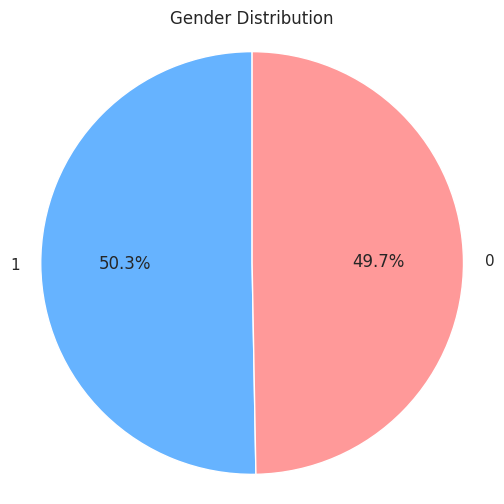

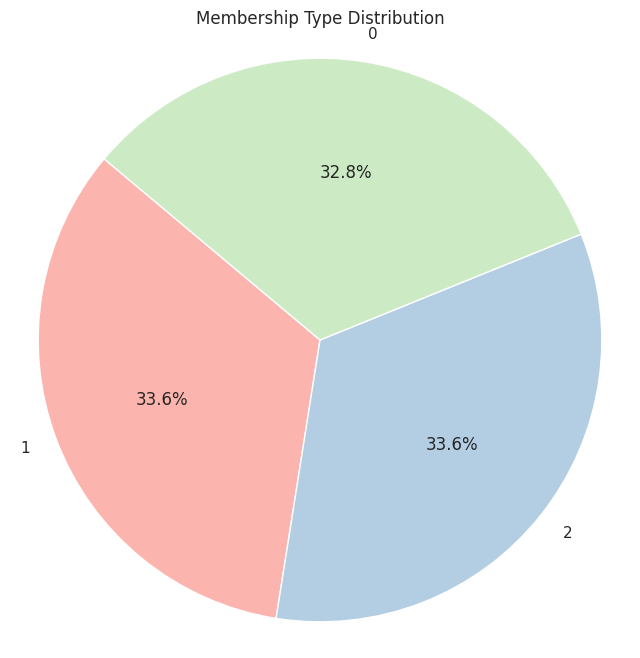

In [73]:
# Pie Chart for Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Pie Chart for Product Category Distribution
category_counts = df['Membership Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Membership Type Distribution')
plt.axis('equal')
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
df['Membership Type'] = LabelEncoder().fit_transform(df['Membership Type'])
df['Satisfaction Level'] = LabelEncoder().fit_transform(df['Satisfaction Level'])

In [54]:
# Display average values
avg_rating = df['Average Rating'].mean()
avg_membership = df['Membership Type'].mean()
avg_satisfaction = df['Satisfaction Level'].mean()

print(f"Average Rating: {avg_rating:.2f}")
print(f"Average Membership Type: {avg_membership:.2f}")
print(f"Average Satisfaction Level: {avg_satisfaction:.2f}")

# Create subplot grid
fig = make_subplots(rows=1, cols=3, subplot_titles=("Membership Type", "Satisfaction Level", "Rating"))

# Membership Type histogram
fig.add_trace(
    go.Histogram(x=df['Membership Type'], name='Membership Type', marker_color='indianred'),
    row=1, col=1
)

# Satisfaction Level histogram
fig.add_trace(
    go.Histogram(x=df['Satisfaction Level'], name='Satisfaction Level', marker_color='lightseagreen'),
    row=1, col=2
)

# Rating histogram
fig.add_trace(
    go.Histogram(x=df['Average Rating'], name='Rating', marker_color='goldenrod'),
    row=1, col=3
)

# Update layout
fig.update_layout(
    title_text="Interactive Histograms of Membership, Satisfaction, and Rating",
    height=500,
    width=1100,
    showlegend=False,
    bargap=0.2
)

# X & Y axis labels
fig.update_xaxes(title_text="Membership Type", row=1, col=1)
fig.update_xaxes(title_text="Satisfaction Level", row=1, col=2)
fig.update_xaxes(title_text="Average Rating", row=1, col=3)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)

# Show the interactive plot
fig.show()

Average Rating: 4.02
Average Membership Type: 1.01
Average Satisfaction Level: 1.03


# Removing Customer ID attribute

In [35]:
df.drop('Customer ID', axis=1, inplace=True)
df.columns

Index(['Gender', 'Age', 'City', 'Membership Type', 'Total Spend',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level', 'KMeans_Cluster',
       'DBSCAN_Cluster', 'PCA1', 'PCA2'],
      dtype='object')

# K Means Clustering

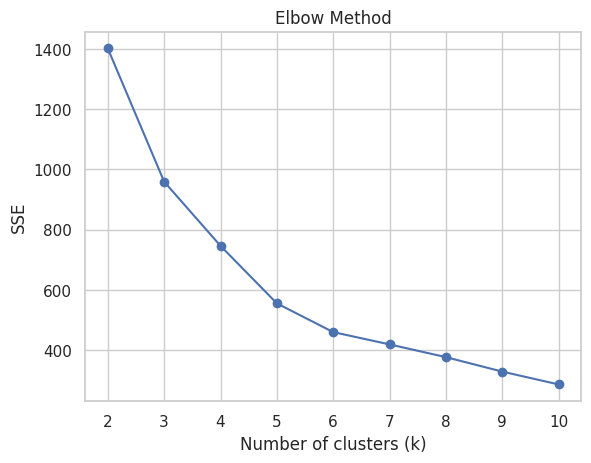

Silhouette Score for KMeans using k=5: 0.48823132914102185


In [63]:
# Elbow method to find optimal k
sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Apply KMeans with optimal k (assume 4 here)
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Silhouette Score
score = silhouette_score(scaled_data, df['KMeans_Cluster'])
print("Silhouette Score for KMeans using k=5:", score)

# Precision Score, Recall Score, F1_score

# Decision Tree

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n--- Decision Tree Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision (macro):", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_dt, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


--- Decision Tree Evaluation ---
Accuracy: 0.9142857142857143
Precision (macro): 0.7447619047619047
Recall (macro): 0.8
F1 Score (macro): 0.7693154996066089

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.77      1.00      0.87        27
           2       1.00      1.00      1.00        19
           3       0.95      1.00      0.98        20
           4       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.74      0.80      0.77       105
weighted avg       0.85      0.91      0.88       105



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Random Forest

In [70]:
print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


--- Random Forest Evaluation ---
Accuracy: 0.9142857142857143
Precision (macro): 0.7447619047619047
Recall (macro): 0.8
F1 Score (macro): 0.7693154996066089

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.77      1.00      0.87        27
           2       1.00      1.00      1.00        19
           3       0.95      1.00      0.98        20
           4       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.74      0.80      0.77       105
weighted avg       0.85      0.91      0.88       105



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# DBScan Using PCA

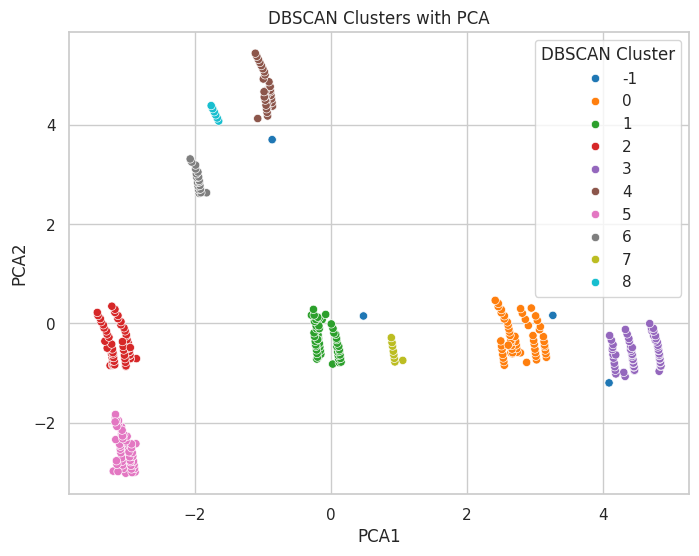

In [37]:
# One-hot encode categorical columns like 'City' and 'Gender' if they exist
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Apply PCA for 2D visualization (not for DBSCAN input)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DBSCAN clustering (tune eps and min_samples)
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add results to DataFrame for plotting
df_encoded['DBSCAN_Cluster'] = clusters
df_encoded['PCA1'] = X_pca[:, 0]
df_encoded['PCA2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10')
plt.title('DBSCAN Clusters with PCA')
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.show()

# Optional: silhouette score (excluding noise points -1)
labels = df_encoded['DBSCAN_Cluster']
if len(set(labels)) > 1 and -1 in labels:
    mask = labels != -1
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f'Silhouette Score (excluding noise): {score}')

#Cluster Visualization using PCA

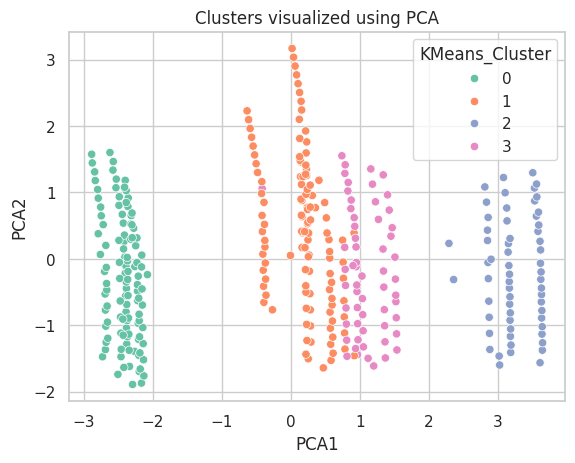

In [20]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2')
plt.title('Clusters visualized using PCA')
plt.show()

In [22]:
X = features
y = df['KMeans_Cluster']  # Treat clusters as class labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



# Identification of Key Customer Segments

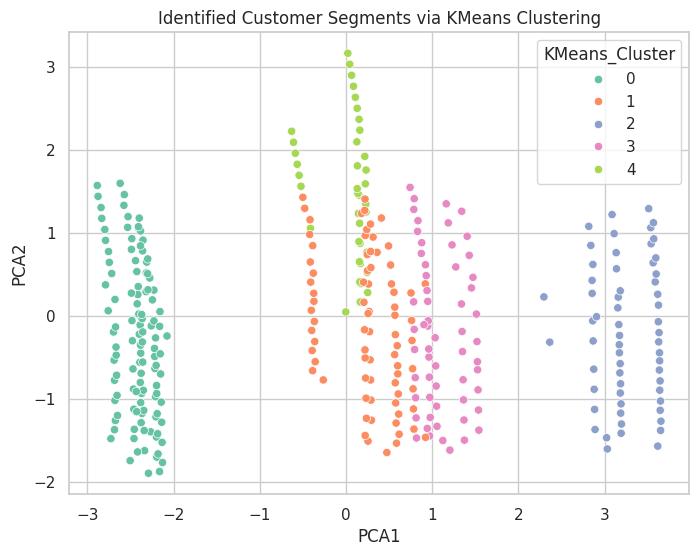

In [64]:
# KMeans clustering (already done, using 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2')
plt.title('Identified Customer Segments via KMeans Clustering')
plt.show()

# Improved Marketing Strategies Based on Segmentation Insights

Cluster-based Marketing Insights:
   KMeans_Cluster  Total Spend  Items Purchased  Average Rating  \
0               0   474.223684         8.517544        3.326316   
1               1   775.057143        11.298701        4.085714   
2               2  1455.549153        19.949153        4.808475   
3               3  1164.250000        15.241379        4.539655   
4               4   697.180000        12.350000        3.985000   

   Days Since Last Purchase  Satisfaction Level  
0                 31.780702            1.017544  
1                 19.415584            0.571429  
2                 11.288136            1.000000  
3                 24.706897            1.000000  
4                 51.125000            2.000000  


<ipython-input-65-5ef4c132b4fd>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




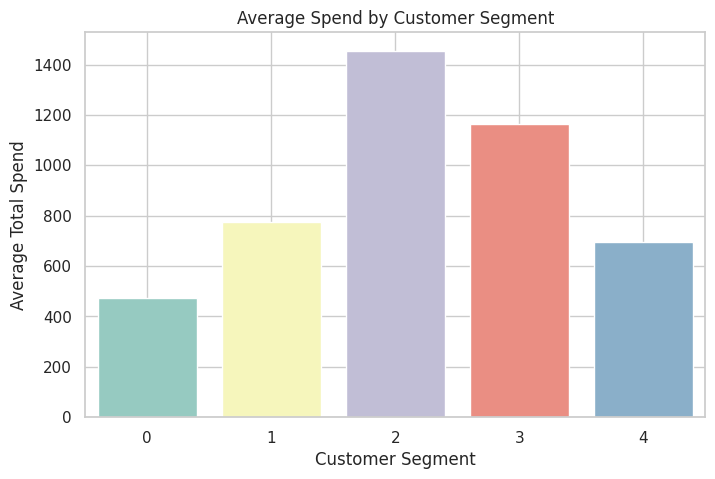

In [65]:
# Group by cluster and compute segment statistics
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean',
    'Average Rating': 'mean',
    'Days Since Last Purchase': 'mean',
    'Satisfaction Level': 'mean'
}).reset_index()

print("Cluster-based Marketing Insights:")
print(cluster_summary)

# Optional: visualize average spend per cluster
plt.figure(figsize=(8,5))
sns.barplot(data=cluster_summary, x='KMeans_Cluster', y='Total Spend', palette='Set3')
plt.title('Average Spend by Customer Segment')
plt.ylabel('Average Total Spend')
plt.xlabel('Customer Segment')
plt.grid(True)
plt.show()

# Classification Model That Predicts Customer Categories

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Use original features and target as clusters
X = features
y = df['KMeans_Cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Classification Accuracy: 0.9904761904761905
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        19
           3       0.95      1.00      0.98        20
           4       1.00      0.89      0.94         9

    accuracy                           0.99       105
   macro avg       0.99      0.98      0.98       105
weighted avg       0.99      0.99      0.99       105

